In [1]:
#Adaboost
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

# Import data of the titanic passengers
data_titanic = pd.read_csv("titanic_data.csv")

# Preprocessing
# Not all data is important for the training. The PassengerId, the name, the number of siblings, the parch, the ticket number
# and the cabin number are not important and therefore they will be dropped
data_titanic = data_titanic.drop(data_titanic.columns[[0, 3, 6, 7, 8, 10]], axis = 1)

# Fill the gaps:
# For the age: Compute the average of ages of all passengers on board and take it as value
ages = data_titanic["Age"]
age_average = round(ages.mean(axis = 0,  skipna = True)) 
print('Age average: ', age_average)

def set_age(Age):
    age = Age
    if pd.isnull(age):
        return age_average
    else:
        return age

data_titanic['Age'] = data_titanic['Age'].apply(set_age)
    
# For the embarked: Take the most occuring value, available options: S, C and Q
Embarked = data_titanic["Embarked"]
count_S = 0
count_C = 0
count_Q = 0

# Count embarks
for i in range(data_titanic.shape[0]):
    if (Embarked[i] == 'S'):
        count_S += 1
    if (Embarked[i] == 'C'):
        count_C += 1
    if (Embarked[i] == 'Q'):
        count_Q += 1
        
if ((count_S >= count_C) and (count_S >= count_Q)):
    common_embarked = 'S'
if ((count_C > count_S) and (count_C >= count_Q)):
    common_embarked = 'C'
if ((count_Q >= count_S) and (count_Q >= count_C)):
    common_embarked = 'Q'
        
def set_Embarked(Embarked):
    embarked = Embarked
    if pd.isnull(embarked):
        return common_embarked
    else:
        return embarked

data_titanic['Embarked'] = data_titanic['Embarked'].apply(set_Embarked)

# Gender and Embarked have to be replaced by values: Set male = 0, female = 1 and S = 0, C = 1, Q = 2
replace_gender = {data_titanic.columns[2]:     {"male": 0, "female": 1}}
replace_embarked = {data_titanic.columns[5]:     {"S": 0, "C": 1, "Q": 2}}
data_titanic = data_titanic.replace(replace_gender)
data_titanic = data_titanic.replace(replace_embarked)

Age average:  30


In [2]:
# Split data into train and evaluation subsets, proportion 1:4
input_data = data_titanic.drop(data_titanic.columns[[0]], axis = 1) # Input has to be without "Survived" statement
target_data = data_titanic['Survived'] # KNN algorithm has to predict survied statement
input_train, input_evaluate, target_train, target_evaluate = train_test_split(input_data , target_data, test_size = 0.25)

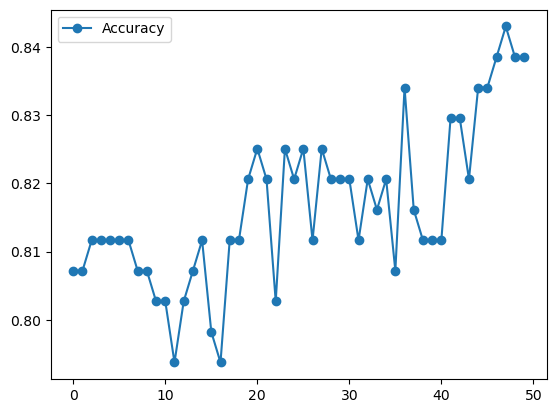

As expected, the accuracy becomes better with an increasing number of iterations.


In [3]:
# Perform Adaboost
# Use 50 Iterations
Iteration = [i for i in range(0,50)]
accuracies = [0] * 50

#Iteration
for i in Iteration:
    classifier = AdaBoostClassifier(n_estimators = i+1, random_state = 0)
    classifier.fit(input_train,target_train)
    target_pred = classifier.predict(input_evaluate)
    accuracies[i] = metrics.accuracy_score(target_pred, target_evaluate)
    
plt.plot(Iteration, accuracies,  '-o', label='Accuracy')
plt.legend()
plt.show()
print("As expected, the accuracy becomes better with an increasing number of iterations.")